In [1]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import matplotlib as mpl
from cycler import cycler
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.transforms as mtransforms
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.lines as mlines


In [2]:
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['font.size'] = 30
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.serif'] = 'Times New Roman'
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['font.family'] = 'serif'
plt.rcParams['axes.prop_cycle'] = cycler(alpha=[1])
mpl.rcParams['figure.figsize'] = [12 , 12]
mpl.rcParams['text.usetex'] = False
mpl.rcParams['legend.edgecolor'] = 'k'
mpl.rcParams['legend.framealpha'] = 1
mpl.rcParams['legend.fancybox'] = False

ColList = ['#1F13FF','#FF00D0', '#2A2A72', '#bbbdbf']


In [3]:
RNCRN_Simulation=[]
with open('data/bessel_osc_RNCRN_traj.csv',newline='') as csvfile:
    data = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for row in data:
        RNCRN_Simulation.append([float(datapoint) for datapoint in row[0].split(',')])
        
RNCRN_Simulation=np.asarray(RNCRN_Simulation) 


NonKin_Simulation=[]
with open('data/bessel_osc_non_kinetic_traj.csv',newline='') as csvfile:
    data = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for row in data:
        NonKin_Simulation.append([float(datapoint) for datapoint in row[0].split(',')])
        
NonKin_Simulation=np.asarray(NonKin_Simulation) 


RNCRN_Simulation_Dynamics=[]
with open('data/bessel_osc_RNCRN_dynamics.csv',newline='') as csvfile:
    data = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for row in data:
        RNCRN_Simulation_Dynamics.append([float(datapoint) for datapoint in row[0].split(',')])
        
RNCRN_Simulation_Dynamics=np.asarray(RNCRN_Simulation_Dynamics) 

N = int(np.sqrt(RNCRN_Simulation_Dynamics.shape[0]));
RNCRN_Simulation_Dynamics_X1 = RNCRN_Simulation_Dynamics[:,0].reshape((N, N));
RNCRN_Simulation_Dynamics_X2 = RNCRN_Simulation_Dynamics[:,1].reshape((N, N));
RNCRN_Simulation_Dynamics_D_X1 = RNCRN_Simulation_Dynamics[:,2].reshape((N, N));
RNCRN_Simulation_Dynamics_D_X2 = RNCRN_Simulation_Dynamics[:,3].reshape((N, N));


NonKin_Simulation_Dynamics=[]
with open('data/bessel_osc_non_kinetic_dynamics.csv',newline='') as csvfile:
    data = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for row in data:
        NonKin_Simulation_Dynamics.append([float(datapoint) for datapoint in row[0].split(',')])
        
NonKin_Simulation_Dynamics=np.asarray(NonKin_Simulation_Dynamics) 

NonKin_Simulation_Dynamics_X1 = NonKin_Simulation_Dynamics[:,0].reshape((N, N));
NonKin_Simulation_Dynamics_X2 = NonKin_Simulation_Dynamics[:,1].reshape((N, N));
NonKin_Simulation_Dynamics_D_X1 = NonKin_Simulation_Dynamics[:,2].reshape((N, N));
NonKin_Simulation_Dynamics_D_X2 = NonKin_Simulation_Dynamics[:,3].reshape((N, N));

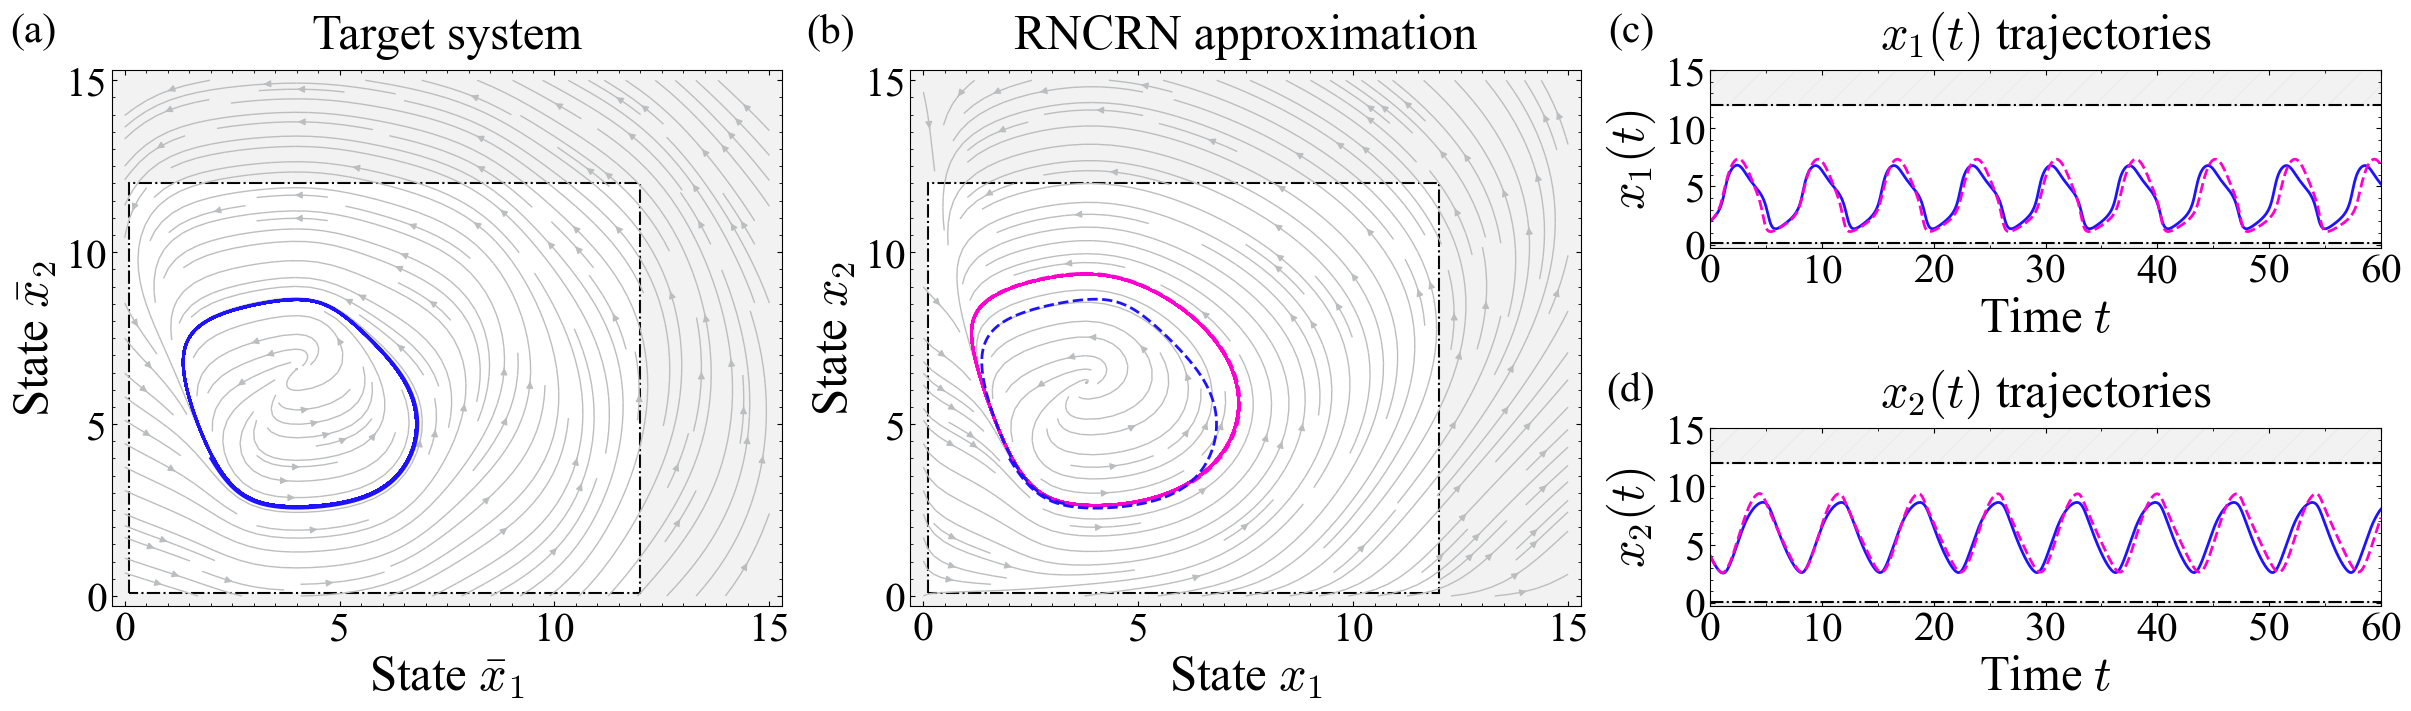

In [4]:
mpl.rcParams['figure.figsize'] = [24 ,7]

fig, axs = plt.subplot_mosaic([['(a)', '(b)', '(c)'],['(a)','(b)', '(d)']],  gridspec_kw={ 'width_ratios':[1,1,1]}, layout='constrained')


tickfontsize=30
labelfontsize=35
titlefontsize=35   

density = 1.5

for label, ax in axs.items():
    # label physical distance to the left and up:
    trans = mtransforms.ScaledTranslation(-40/72, 14/72, fig.dpi_scale_trans)
    ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
            fontsize='medium', va='bottom', fontfamily='serif', ha='right')

ax1 = axs['(a)']
ax1.fill([0.1, 0.1, 12, 12], [0.1, 12, 12, 0.1], color = 'white', edgecolor='k', linewidth=1.5, linestyle='dashdot')
ax1.set_xticks([0,5,10,15])
ax1.set_yticks([0,5,10,15])
ax1.set_xlabel(r'State $\bar{x}_1$', fontsize=labelfontsize )
ax1.set_ylabel(r'State $\bar{x}_2$', fontsize=labelfontsize )
ax1.set_title(r'Target system', fontsize=titlefontsize, pad=15.5)
ax1.set_xlim(-0.3,15.3)
ax1.set_ylim(-0.3, 15.3)
ax1.streamplot(np.transpose(NonKin_Simulation_Dynamics_X1), np.transpose(NonKin_Simulation_Dynamics_X2),np.transpose(NonKin_Simulation_Dynamics_D_X1), np.transpose(NonKin_Simulation_Dynamics_D_X2), arrowstyle='-|>', color=ColList[3], linewidth=1, density = density)
ax1.plot(NonKin_Simulation[:,1], NonKin_Simulation[:,2],'-' ,color=ColList[0], label='$\mathbf{\\bar{x}}$')
handles, labels = ax1.get_legend_handles_labels()
arrow_handle = mlines.Line2D([], [], color=ColList[3], marker='>', markersize=7)
labels = labels + ['$f(\mathbf{\\bar{x}})$']
handles = handles + [arrow_handle]
ax1.tick_params(bottom=True, top=True, left=True, right=True)
ax1.tick_params(bottom=True, top=True, left=True, right=True, which='minor')
ax1.xaxis.set_minor_locator(AutoMinorLocator(10))
ax1.yaxis.set_minor_locator(AutoMinorLocator(10))
ax1.tick_params(axis="x", direction="in", labelsize=tickfontsize)
ax1.tick_params(axis="x", direction="in", which="minor")
ax1.tick_params(axis="y", direction="in", labelsize=tickfontsize)
ax1.tick_params(axis="y", direction="in", which="minor")
ax1.fill([-0.5, -0.5, 20, 20], [12, 16, 16, 12], facecolor = 'gray', alpha=0.1, linewidth=None)
ax1.fill([-0.5, -0.5, 20, 20], [-0.5, 0.1, 0.1, -0.5], facecolor = 'gray', alpha=0.1, linewidth=None)
ax1.fill([-0.5, -0.5, 0.1, 0.1], [0.1, 12, 12, 0.1], facecolor = 'gray', alpha=0.1, linewidth=None)
ax1.fill([12, 12, 20, 20], [0.1, 12, 12, 0.1], facecolor = 'gray', alpha=0.1,linewidth=None)


ax2 = axs['(b)']
ax2.fill([0.1, 0.1, 12, 12], [0.1, 12, 12, 0.1], color = 'white', edgecolor='k', linewidth=1.5, linestyle='dashdot')
ax2.set_xticks([0,5,10,15])
ax2.set_yticks([0,5,10,15])
ax2.set_xlabel(r'State $x_1$', fontsize=labelfontsize)
ax2.set_ylabel(r'State $x_2$', fontsize=labelfontsize )
ax2.set_title(r'RNCRN approximation', fontsize=titlefontsize, pad=15.5)
ax2.set_xlim(-0.3,15.3)
ax2.set_ylim(-0.3, 15.3)
ax2.streamplot(np.transpose(RNCRN_Simulation_Dynamics_X1), np.transpose(RNCRN_Simulation_Dynamics_X2),np.transpose(RNCRN_Simulation_Dynamics_D_X1), np.transpose(RNCRN_Simulation_Dynamics_D_X2), arrowstyle='-|>', color=ColList[3], linewidth=1, density = density)
ax2.plot(RNCRN_Simulation[:,1], RNCRN_Simulation[:,2],'--' ,color=ColList[1], label='$\mathbf{x}:\\mu = 10^{-2}$')
ax2.plot(NonKin_Simulation[:1200,1], NonKin_Simulation[:1200,2],'--' ,color=ColList[0])
handles, labels = ax2.get_legend_handles_labels()
arrow_handle = mlines.Line2D([], [], color=ColList[3], marker='>', markersize=7)
labels = labels + ['$g(\mathbf{x})$']
handles = handles + [arrow_handle]
ax2.tick_params(bottom=True, top=True, left=True, right=True)
ax2.tick_params(bottom=True, top=True, left=True, right=True, which='minor')
ax2.xaxis.set_minor_locator(AutoMinorLocator(10))
ax2.yaxis.set_minor_locator(AutoMinorLocator(10))
ax2.tick_params(axis="x", direction="in", labelsize=tickfontsize)
ax2.tick_params(axis="x", direction="in", which="minor")
ax2.tick_params(axis="y", direction="in", labelsize=tickfontsize)
ax2.tick_params(axis="y", direction="in", which="minor")
ax2.fill([-0.5, -0.5, 20, 20], [12, 16, 16, 12], facecolor = 'gray', alpha=0.1, linewidth=None)
ax2.fill([-0.5, -0.5, 20, 20], [-0.5, 0.1, 0.1, -0.5], facecolor = 'gray', alpha=0.1, linewidth=None)
ax2.fill([-0.5, -0.5, 0.1, 0.1], [0.1, 12, 12, 0.1], facecolor = 'gray', alpha=0.1, linewidth=None)
ax2.fill([12, 12, 20, 20], [0.1, 12, 12, 0.1], facecolor = 'gray', alpha=0.1,linewidth=None)


ax3 = axs['(c)']
ax3.plot(NonKin_Simulation[:,0], NonKin_Simulation[:,1],'-' ,color=ColList[0],label='$\\bar{x}_1$')
ax3.plot(RNCRN_Simulation[:,0], RNCRN_Simulation[:,1],'--' ,color=ColList[1], label='$x_1:\\mu = 10^{-2}$')
ax3.set_xticks(np.arange(0,110,10))
ax3.set_yticks(np.arange(0,16,5))
ax3.tick_params(axis='both', which='major' )
ax3.set_ylabel(r'$x_1(t)$', fontsize=labelfontsize )
ax3.set_xlabel(r'Time $t$', fontsize=labelfontsize )
ax3.set_title(r'$x_1(t)$ trajectories', fontsize=titlefontsize, pad=15.5)
ax3.set_xlim(0,60)
ax3.set_ylim(-0.3, 15)
ax3.tick_params(bottom=True, top=True, left=True, right=True)
ax3.tick_params(bottom=True, top=True, left=True, right=True, which='minor')
ax3.xaxis.set_minor_locator(AutoMinorLocator(2))
ax3.yaxis.set_minor_locator(AutoMinorLocator(5))
ax3.tick_params(axis="x", direction="in", labelsize=tickfontsize)
ax3.tick_params(axis="x", direction="in", which="minor")
ax3.tick_params(axis="y", direction="in",labelsize=tickfontsize)
ax3.tick_params(axis="y", direction="in", which="minor")
ax3.fill([0, 0, 300, 300], [12, 15, 15, 12], color = 'gray', alpha=0.1)
ax3.fill([0, 0, 300, 300], [12, 15, 15, 12], color = 'None', alpha=0.1, edgecolor=ColList[3], hatch="/")
ax3.fill([0, 0, 300, 300], [-0.3, 0.1, 0.1, -0.3], color = 'gray', alpha=0.1)
ax3.fill([0, 0, 300, 300], [-0.3, 0.1, 0.1, -0.3], color = 'None', alpha=0.1, edgecolor=ColList[3], hatch="/")
ax3.hlines(0.1, -2, 300, facecolor ='white', edgecolor='k', linewidth=1.5, linestyle='dashdot' )
ax3.hlines(12, -2, 300, facecolor ='white', edgecolor='k', linewidth=1.5, linestyle='dashdot' )


ax4 = axs['(d)']
ax4.plot(NonKin_Simulation[:,0], NonKin_Simulation[:,2],'-' ,color=ColList[0],label='$\\bar{x}_2$')
ax4.plot(RNCRN_Simulation[:,0], RNCRN_Simulation[:,2],'--' ,color=ColList[1],label='$x_2:\\mu = 10^{-2}$')
ax4.set_xticks(np.arange(0,110,10))
ax4.set_yticks(np.arange(0,16,5))
ax4.tick_params(axis='both', which='major' )
ax4.set_xlabel(r'Time $t$', fontsize=labelfontsize )
ax4.set_ylabel(r'$x_2(t)$', fontsize=labelfontsize )
ax4.set_title(r'$x_2(t)$ trajectories', fontsize=titlefontsize, pad=15.5)
ax4.set_xlim(0,60)
ax4.set_ylim(-0.3, 15)
ax4.tick_params(bottom=True, top=True, left=True, right=True)
ax4.tick_params(bottom=True, top=True, left=True, right=True, which='minor')
ax4.xaxis.set_minor_locator(AutoMinorLocator(2))
ax4.yaxis.set_minor_locator(AutoMinorLocator(5))
ax4.tick_params(axis="x", direction="in", labelsize=tickfontsize)
ax4.tick_params(axis="x", direction="in", which="minor")
ax4.tick_params(axis="y", direction="in", labelsize=tickfontsize)
ax4.tick_params(axis="y", direction="in", which="minor")
ax4.fill([0, 0, 300, 300], [12, 15, 15, 12], color = 'gray', alpha=0.1)
ax4.fill([0, 0, 300, 300], [12, 15, 15, 12], color = 'None', alpha=0.1, edgecolor=ColList[3], hatch="/")
ax4.fill([0, 0, 300, 300], [-0.3, 0.1, 0.1, -0.3], color = 'gray', alpha=0.1)
ax4.fill([0, 0, 300, 300], [-0.3, 0.1, 0.1, -0.3], color = 'None', alpha=0.1, edgecolor=ColList[3], hatch="/")
ax4.hlines(0.1, -2, 300, facecolor ='white', edgecolor='k', linewidth=1.5, linestyle='dashdot' )
ax4.hlines(12, -2, 300, facecolor ='white', edgecolor='k', linewidth=1.5, linestyle='dashdot' )

plt.show()
fig.savefig('figures/figure_3.pdf', bbox_inches='tight')